# Sus variables

**Movtiation:** I think `njets` and `X_wt_tag` were two of the reweighting variables that our network had a harder time reweighting, so I _think_ I just wanted to try to make a few of these visualization plots!!

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap

from scipy.optimize import curve_fit

import os
              
dirname = '../../hh4b/hh4b-plots'
os.sys.path.append(dirname)

from hh4b_plots.hh4b_plots import hh4b_plots, get_variable_bins

#plt.style.use(os.path.join(dirname, 'hh4b_plots/stylesheets/ATLAS.mplstyle'))

%load_ext autoreload
%autoreload 2

Using uproot4


In [3]:
yrs = ['16','17','18']
mcs=['a','d','e']

isVBF = False
VBFflag = '& ~pass_vbf_sel'
Xwt_cut=1.5

extra_sel = f'X_wt_tag > {Xwt_cut}' + VBFflag


ref_val = 25

columns=['pt_hh','X_wt_tag','njets','m_hh','X_hh','m_h1','m_h2']
bins_list = [np.linspace(0,200,51),
             np.linspace(0,10,41) if Xwt_cut == 0 else np.linspace(1.5,10,35),
             np.arange(3.5,10.5),
             get_variable_bins([275,1050], res=0.05),
             np.linspace(0,1.6,21)]

ylabels = []

for col,bins in zip(columns,bins_list):
    
    yl = f'Entries'
    
    if col == 'm_hh':
        bin_w = ref_val
    else:
        bin_w = bins[1] - bins[0]
        
    if (bin_w *10 % 10) == 0 :
        bin_w = int(bin_w)
    
    if bin_w != 1:
        yl += f' / {bin_w} GeV' 
    
    ylabels.append(yl)

In [10]:
# # nominal networks

# target_reg='4b'

# datDir = '../data/RR/cryptotuples/quad45_OHEbkt/orig_liaoshan/'
# dat_names = [f'{datDir}/data{yr}_Xhh_45_NN_100_bootstraps.root' for yr in yrs]  
# NNT_tag = 'Q45-OHEbkt'

# figDir = 'figures/incl_rw/Q45_OHEbkt_{}'

In [27]:
# Marin's networks

target_reg='4b'

datDir = '../data/RR/cryptotuples/ttbar/quads/rw_pre_Xwt/'
dat_names = [f'{datDir}/data{yr}_Xhh_45_NN_100_bootstraps.root' for yr in yrs]  
NNT_tag = 'Q45-rw-no-Xwt-cut'

figDir = 'figures/incl_rw/Q45_rw_preXwt_{}/'

In [26]:
# # rev deta samples
# target_reg='4b'

# datDir = '../data/RR/cryptotuples/rev_deta/quad_45/'
# dat_names = [f'{datDir}/data_rev_deta_Xhh_45_{yr}_NN_100_bootstraps.root' for yr in yrs]  
# NNT_tag = 'Q45-rev-deta'

# figDir = 'figures/incl_rw/Q45_rev_deta_{}'

In [ ]:
with uproot.open(data_file) as f:
    df = f['control'].arrays(['m_h1','m_h2'],library='pd')

In [ ]:
plt.hist2d(*df.values.T,[100,100])
plt.show()

In [11]:
bkgd_label='Reweighted 2b data'
data_label=f'{target_reg} data'
withPulls=False

Getting the TTree(s) control


../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:1662: RuntimeWarning: invalid value encountered in double_scalars
  f"$\chi2$ / ndf = {round(chi2_result['X2']/chi2_result['ndf'], 3)}"


Getting the TTree(s) validation


../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:1662: RuntimeWarning: invalid value encountered in double_scalars
  f"$\chi2$ / ndf = {round(chi2_result['X2']/chi2_result['ndf'], 3)}"


Getting the TTree(s) sig


../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:693: RuntimeWarning: invalid value encountered in true_divide
  pi = (w1 * W1 / (s1 ** 2)) + (w2 * W2 / (s2 ** 2)) / (
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:694: RuntimeWarning: invalid value encountered in true_divide
  ((W1 ** 2) / (s1 ** 2)) + ((W2 ** 2) / (s2 ** 2))
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:698: RuntimeWarning: invalid value encountered in true_divide
  (W1 * w2 - W2 * w1) ** 2 / (W1 ** 2 * s2 ** 2 + W2 ** 2 * s1 ** 2),
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:707: RuntimeWarning: invalid value encountered in true_divide
  frac = 1 + ((W2 ** 2) * (s1 ** 2)) / ((W1 ** 2) / (s2 ** 2))
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:1336: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(main_ylim)
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:693: RuntimeWarning: invalid value encountered in true_divide
  pi = (w1 * 

Getting the TTree(s) control


KeyInFileError: not found: 'NN_d24_weight_bstrap_med_16'
in file ../data/RR/cryptotuples/ttbar/quads/rw_pre_Xwt//data17_Xhh_45_NN_100_bootstraps.root
in object /control;1

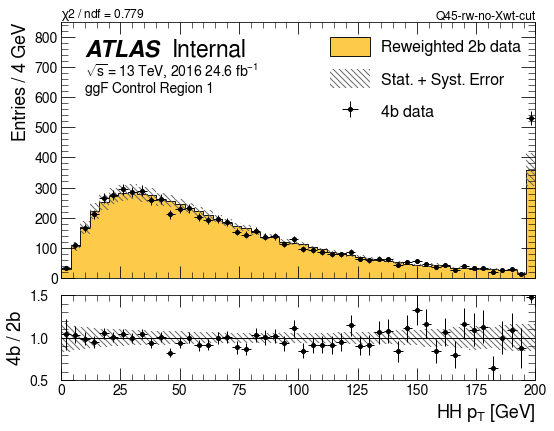

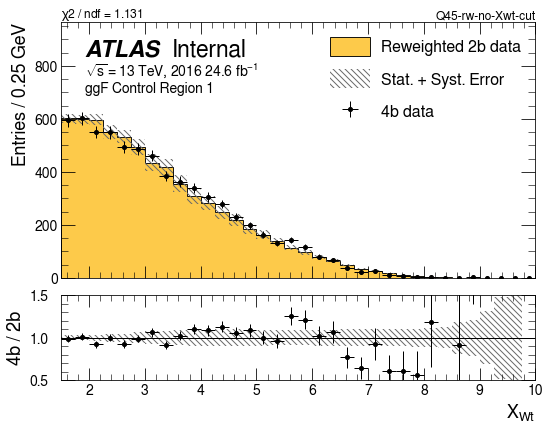

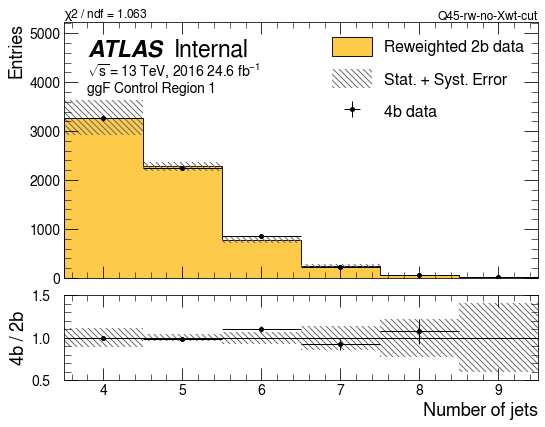

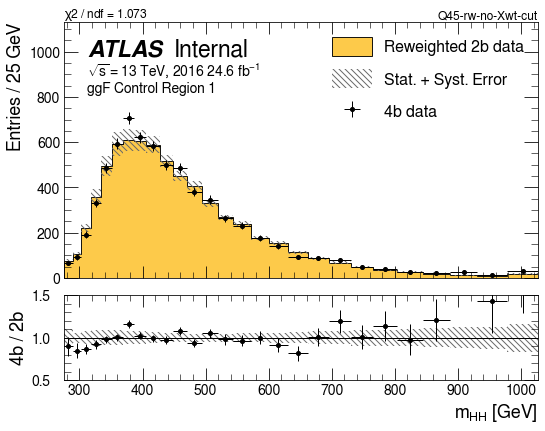

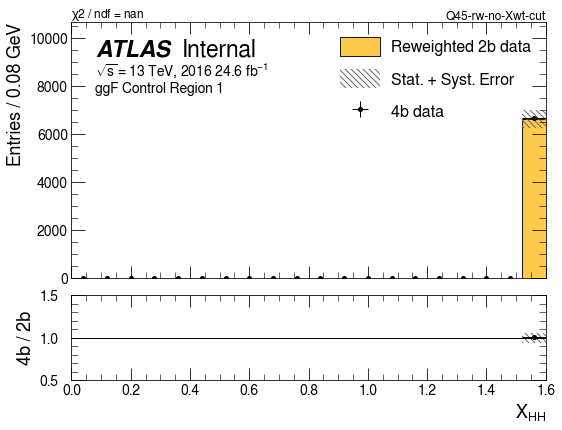

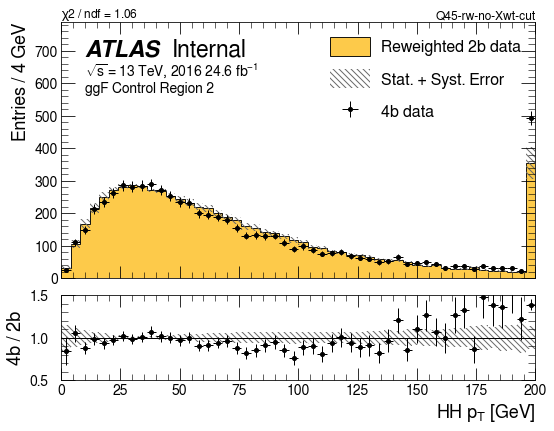

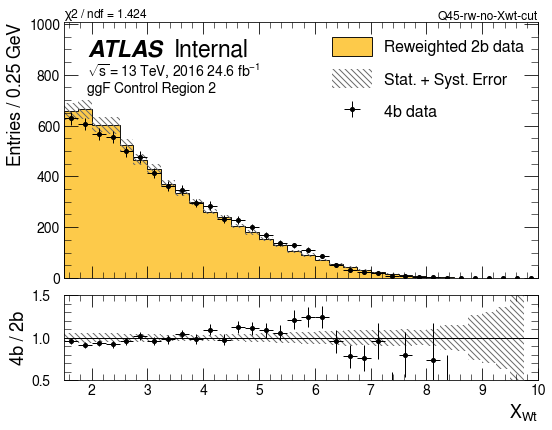

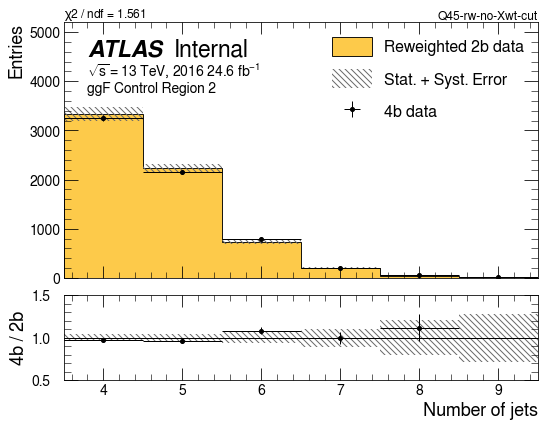

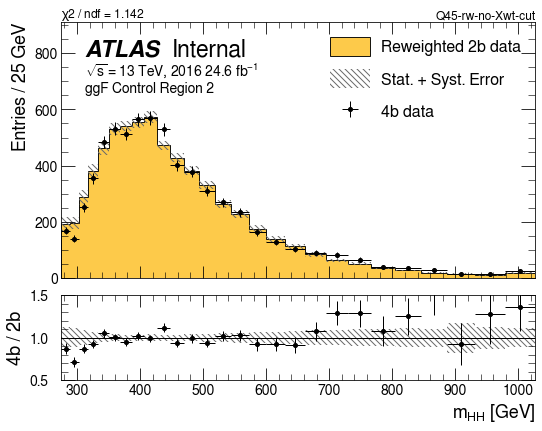

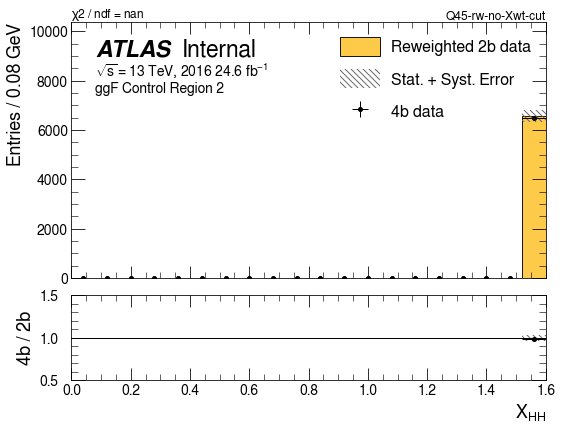

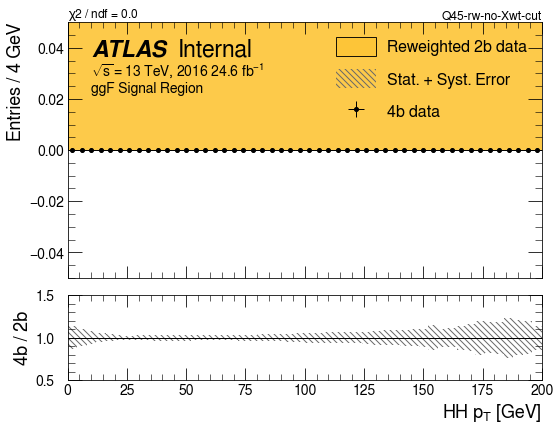

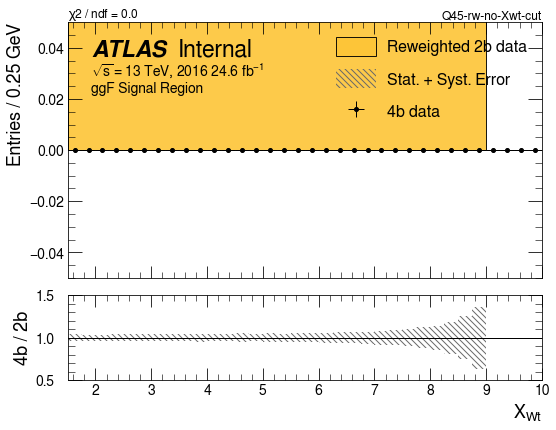

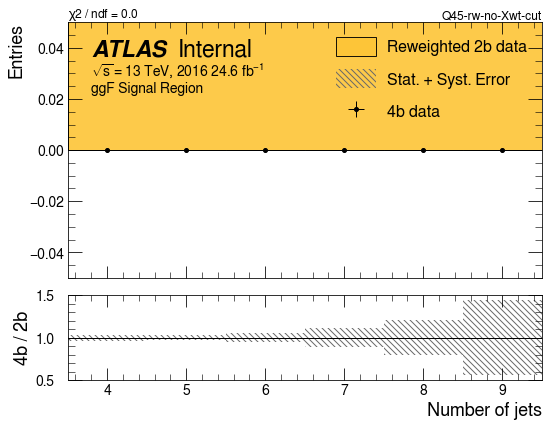

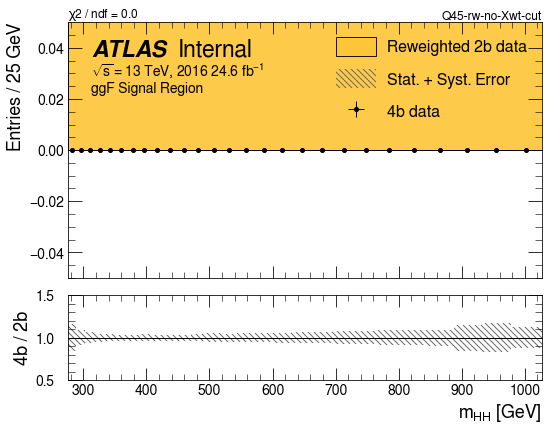

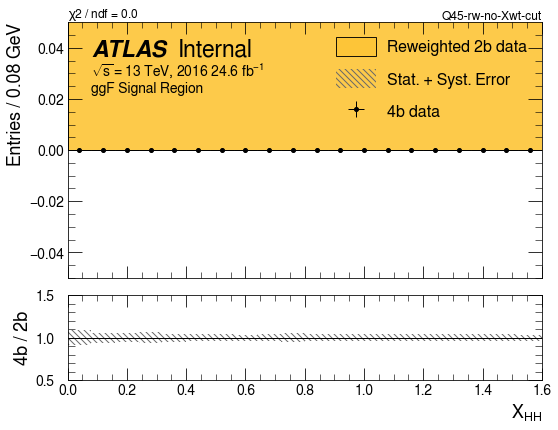

In [28]:
#The meat of the thing: set up an hh4b_plots object
plotter = hh4b_plots()

for yr, data_file in zip(yrs+['all'],dat_names):

    for tree in ['control','validation','sig']:
    
        #Load in data
        if yrs == 'all':
            plotter.load(dat_names, tree, ['16','17','18'], columns=columns, target_reg=target_reg)
        else:
            plotter.load([data_file], tree, yrs, columns=columns, target_reg=target_reg)
            
        #Set up labeling
        plotter.set_labels(NNT_tag=NNT_tag, isggF=(not isVBF), yr=yr)

        #Set up background. If no_rw, we don't want bootstrap. This is enforced internally
        #as well, but done explicitly here for transparency
        plotter.set_bkgd(target_reg=target_reg, extra_sel=extra_sel,
                         yr=yr, with_bootstrap=True, with_poisson=True, with_shape=True, stack=False)

        #Set up data
        plotter.set_target(target_reg=target_reg, extra_sel=extra_sel, yr=yr, stack=False)

        for col, bins, yl in zip(columns, bins_list,ylabels):

            plotter.hist1d(col, bins=bins, withRatio=True,
                           underflow=True,overflow=True,
                           fc='hh:darkyellow', alpha=0.9, ec='black',
                           ylabel=yl,
                           bkgd_label=bkgd_label, data_label=data_label, 
                           withPulls=withPulls,
                           rat_label=f'{target_reg} / 2b', 
                           rat_bounds=[0.5, 1.5], bkgd=None, data=None)


            plt.savefig(os.path.join(figDir.format(yr),f'{col}-{tree}.png'))
            plt.savefig(os.path.join(figDir.format(yr),f'{col}-{tree}.pdf'))

    #break